**Maidah Shah**  
Assignment 2: Final Project, EDA & Visualizing Tidied UN Dataset   
INF1340H, Fall 2022   
December 15, 2022

Google Colab Link: https://colab.research.google.com/drive/13aYrDnOSW_yiU17WKeADunVo_wbsy-vR?usp=sharing


---
**ASSIGNMENT 1 CODE BELOW**
---

**Maidah Shah**  
Assignment 1: Midterm Project, Tidying UN Dataset   
INF1340H, Fall 2022   
November 9, 2022

In [1]:
### STEP 1 ###
# Upload the dataset to google colab.

# Examine the raw data. As there are 6 tables, each in seperate tabs, we will split the dataset and store each split as a data frame.
# Tabs: "CONTENTS", "ANNEX", and "NOTES" do not need to be split as they just contain supplementary information to help interpret the data. 

import pandas as pd # Import library to read and split the data file, as well as to perform other functions later.
data = pd.ExcelFile("/content/UN_MigrantStockTotal_2015.xlsx") # Read in the data using ExcelFile as the file is in an xlsx format.

# Split each tab into a data frame containing one table using read_excel for the xlsx format. There will be 6 data frames in total, one for each tab/table. 
# Tab numbers correspond to table numbers. We will set the data frame numbers to match.
# Skip the first 14 rows in each data frame as they do not contain data.
df1orig = pd.read_excel(data, sheet_name='Table 1', skiprows=range(14)) # The "orig" stands for original as we will copy the data frames later and the original will remain unchanged.
df2orig = pd.read_excel(data, sheet_name='Table 2', skiprows=range(14))
df3orig = pd.read_excel(data, sheet_name='Table 3', skiprows=range(14))
df4orig = pd.read_excel(data, sheet_name='Table 4', skiprows=range(14))
df5orig = pd.read_excel(data, sheet_name='Table 5', skiprows=range(14))
df6orig = pd.read_excel(data, sheet_name='Table 6', skiprows=range(14))

In [ ]:
### STEP 2 ###
# Examine the table for violations of tidy data principles. We will start with df1.

df1orig.head()

# Tidy Data Principle 1: Each observation forms a row.
# Tidy Data Principle 2: Each variable forms its own column.
# Tidy Data Principle 3: Variables need to be in cells, not rows and columns. 
# Tidy Data Principle 4: Each table column needs to have a singular data type.
# Tidy Data Principle 5: A single observational unit must be in one table.

# FINDINGS: 
# We can see that the migrant stock/sex headers are not merged or labelled for all the years. 
# There appear to be two header rows with stock/sex and year as the only multilevel headers in the data frame. 
# Migrant stock, sex, and year are three unique variables.
# The "Sort order", "Major area, region, country or area of destination", "Notes", "Country code", and "Type of data (a)" columns repeat in each data frame, except for "Type of data (a)" in df2. 
# A unique identifier column, "Sort order" is already present in each data frame, so "Major area, region, country or area of destination" and "Country code" appear redundant.
# "Notes" and "Type of data (a)" seem to be supplementary details to help interpret the data.

# VIOLATIONS: 
# Each observation does not form a row, as the year variable is embedded in a row and the sex columns are not all labelled. 
# Column headers are values that contain useful information and not variable names (e.g., Male, 1990), and each variable does not have its own column.
# Variables are stored in rows and columns (i.e., sex, year).
# Multiple variables and data types are stored in one column (i.e., sex, year).
# There are multiple observational units in the table (i.e., area/region/country, migrant stock)

# PLAN:
# We will combine the stock, sex, and year headers into a variable to enable the removal of the second header row with years.
# We will then melt the header into three variables and columns.
# We will then split the data frame into two tables for df1. One for area/region/country, and the second for migrant stock.
# For df2-df6, we will remove the "Major area, region, country or area of destination", "Notes", "Country code", and "Type of data (a)" columns where present in each data frame. 
# If we need these columns at any point, we can append them back to our data frame as we will create a separate table with them for df1.  

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),International migrant stock at mid-year (both sexes),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,International migrant stock at mid-year (female),Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010,...,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
1,1.0,WORLD,NaN,900.0,NaN,152563212,160801752,172703309,191269100,221714243,...,87884839,97866674,114613714,126115435,74815702,79064275,84818470,93402426,107100529,117584801
2,2.0,Developed regions,(b),901.0,NaN,82378628,92306854,103375363,117181109,132560325,...,50536796,57217777,64081077,67618619,42115231,47214055,52838567,59963332,68479248,72863336
3,3.0,Developing regions,(c),902.0,NaN,70184584,68494898,69327946,74087991,89153918,...,37348043,40648897,50532637,58496816,32700471,31850220,31979903,33439094,38621281,44721465
4,4.0,Least developed countries,(d),941.0,NaN,11075966,11711703,10077824,9809634,10018128,...,5361902,5383009,5462714,6463217,5236216,5573685,4721920,4432371,4560536,5493028


In [2]:
### STEP 3 ###

# We will first copy each data frame and make changes to the copy, so if needed, we can refer to the original data frame at any point.

df1 = df1orig.copy(deep=True)
df2 = df2orig.copy(deep=True)
df3 = df3orig.copy(deep=True)
df4 = df4orig.copy(deep=True)
df5 = df5orig.copy(deep=True)
df6 = df6orig.copy(deep=True)

In [3]:
### STEP 4 ###

# Remove the "Major area, region, country or area of destination", "Notes", "Country code", and "Type of data (a)" columns where present in each data frame, except for df1.

df2.drop(columns=['Major area, region, country or area of destination','Notes','Country code'], inplace=True)
df3.drop(columns=['Major area, region, country or area of destination','Notes','Country code','Type of data (a)'], inplace=True)
df4.drop(columns=['Major area, region, country or area of destination','Notes','Country code','Type of data (a)'], inplace=True)
df5.drop(columns=['Major area, region, country or area of destination','Notes','Country code','Type of data (a)'], inplace=True)
df6.drop(columns=['Major area, region, country or area of destination','Notes','Country code','Type of data (a)'], inplace=True)

In [4]:
### STEP 5 ###

# Working on df1.
# Start by assigning column names to all the migrant stock/sex columns, and abbreviate the sex to an initial to simplify splitting of the variable name later.

for i in range(5,23): # This is the range of stock/sex columns.

  if i in range(5,11):
    df1.columns.values[i] = "B" # B for both sexes.
  elif i in range (11,17):
    df1.columns.values[i] = "M" # M for male.
  else:
    df1.columns.values[i] = "F" # F for female.

In [5]:
### STEP 6 ###

# Bring up the year data from the second header row and append it with the sex to enable deletion of the year row later.

for j in range(5,23):

  if j in [5,11,17]: # Corresponds to columns with year value 1990 and so on for each year below.
    df1.columns.values[j] = df1.columns.values[j] + "1990"
  elif j in [6,12,18]:
    df1.columns.values[j] = df1.columns.values[j] + "1995"
  elif j in [7,13,19]:
    df1.columns.values[j] = df1.columns.values[j] + "2000"
  elif j in [8,14,20]:
    df1.columns.values[j] = df1.columns.values[j] + "2005"
  elif j in [9,15,21]:
    df1.columns.values[j] = df1.columns.values[j] + "2010"
  else:
    df1.columns.values[j] = df1.columns.values[j] + "2015"

In [ ]:
### STEP 7 ###

# Confirm that the variable names appear as desired, i.e., "Sex + Year", and that they correspond to the correct sex and year columns.

df1.head(2)

In [6]:
### STEP 8 ###

# Remove the second header row with the year information as that data is now included in the first header row.

df1.drop([0],inplace=True)
df1.head(2) # Confirm that the row was removed.

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),B1990,B1995,B2000,B2005,B2010,...,M2000,M2005,M2010,M2015,F1990,F1995,F2000,F2005,F2010,F2015
1,1.0,WORLD,NaN,900.0,NaN,152563212,160801752,172703309,191269100,221714243,...,87884839,97866674,114613714,126115435,74815702,79064275,84818470,93402426,107100529,117584801
2,2.0,Developed regions,(b),901.0,NaN,82378628,92306854,103375363,117181109,132560325,...,50536796,57217777,64081077,67618619,42115231,47214055,52838567,59963332,68479248,72863336


In [7]:
### STEP 9 ###

# Melt the sex/year from column headers to values in a column. 

df1 = df1.melt(id_vars = ['Sort\norder', 'Major area, region, country or area of destination','Notes','Country code','Type of data (a)'], var_name = "sex_yr", value_name = "International migrant stock at mid-year")
df1.head() # Confirm that the values were pivoted.

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),sex_yr,International migrant stock at mid-year
0,1.0,WORLD,NaN,900.0,NaN,B1990,152563212
1,2.0,Developed regions,(b),901.0,NaN,B1990,82378628
2,3.0,Developing regions,(c),902.0,NaN,B1990,70184584
3,4.0,Least developed countries,(d),941.0,NaN,B1990,11075966
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,B1990,59105261


In [8]:
### STEP 10 ###

# Split sex and year into two variables and columns using the lambda function, also enabling each observation to form a row.

df1 = df1.assign(Sex = lambda x: x.sex_yr.str[0].astype(str), Year = lambda x: x.sex_yr.str[1:].astype(str)).drop("sex_yr",axis=1) 
df1.head() # Confirm that the variable was split as desired.

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),International migrant stock at mid-year,Sex,Year
0,1.0,WORLD,NaN,900.0,NaN,152563212,B,1990
1,2.0,Developed regions,(b),901.0,NaN,82378628,B,1990
2,3.0,Developing regions,(c),902.0,NaN,70184584,B,1990
3,4.0,Least developed countries,(d),941.0,NaN,11075966,B,1990
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,59105261,B,1990


In [ ]:
### STEP 11a ###

# We will create two tables so that a single observational unit is in one table.
# Table 1 will contain area/region/country with details of each area.
# Table 2 will contain the rest of the sex, year, and migrant stock data.

table1 = df1.iloc[:,:-3] # Remove the last three columns.
table2 = df1.iloc[:,[0,5,6,7]] # Keep the first column as the unique id, and the last three columns.

In [ ]:
### Step 11b ###

# Confirm that the table was split as desired, and that it is tidy. Look at header and tail data.

table1

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a)
0,1.0,WORLD,NaN,900.0,NaN
1,2.0,Developed regions,(b),901.0,NaN
2,3.0,Developing regions,(c),902.0,NaN
3,4.0,Least developed countries,(d),941.0,NaN
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN
...,...,...,...,...,...
4765,261.0,Samoa,NaN,882.0,B
4766,262.0,Tokelau,NaN,772.0,B
4767,263.0,Tonga,NaN,776.0,B
4768,264.0,Tuvalu,NaN,798.0,C


In [ ]:
### Step 11c ###

# Confirm that the table was split as desired, and that it is tidy. Look at header and tail data. 

table2

,Sort\norder,International migrant stock at mid-year,Sex,Year
0,1.0,152563212,B,1990
1,2.0,82378628,B,1990
2,3.0,70184584,B,1990
3,4.0,11075966,B,1990
4,5.0,59105261,B,1990
...,...,...,...,...
4765,261.0,2460,F,2015
4766,262.0,254,F,2015
4767,263.0,2604,F,2015
4768,264.0,63,F,2015


In [ ]:
### Step 12a ###

# We will now examine df2 to ensure that the columns outlined above were removed and for violations of tidy data principles.

df2.head()

# FINDINGS: 
# We can see that df2 is similar to df1, except for the columns that were deleted and table header titles. 
# However, because of the columns that were deleted in df2, there is a single observational unit in the table, so we will not need to split the table in 2 as in step 11a. 

# VIOLATIONS:
# df2 violates the same tidy data principles detailed above for df1 in step 2 with the exception of the multiple obervational units in one table.

# PLAN: 
# We will apply the same rules and code from df1 to tidy df2 with the exception of the table splitting in step 11a. 

,Sort\norder,Total population of both sexes at mid-year (thousands),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Total male population at mid-year (thousands),Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Total female population at mid-year (thousands),Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,1990.000,1995.000,2000.000,2005.000,2010.000,2015.000,1990,1995,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
1,1.0,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,2670423.701,2886635.893,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
2,2.0,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,555255.626,568268.456,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
3,3.0,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,2115168.075,2318367.437,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
4,4.0,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,254042.556,292026.742,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625


In [ ]:
### STEP 12b ###

# Working on df2.

# Assign column names to all migrant stock/sex columns as in step 5.
for i in range(1,19): # Adjust range for df2.

  if i in range(1,7):
    df2.columns.values[i] = "B" 
  elif i in range (7,13):
    df2.columns.values[i] = "M"
  else:
    df2.columns.values[i] = "F"

# Append sex and year data as in step 6.
for j in range(1,19): # Adjust range for df2.

  if j in [1,7,13]:
    df2.columns.values[j] = df2.columns.values[j] + "1990"
  elif j in [2,8,14]:
    df2.columns.values[j] = df2.columns.values[j] + "1995"
  elif j in [3,9,15]:
    df2.columns.values[j] = df2.columns.values[j] + "2000"
  elif j in [4,10,16]:
    df2.columns.values[j] = df2.columns.values[j] + "2005"
  elif j in [5,11,17]:
    df2.columns.values[j] = df2.columns.values[j] + "2010"
  else:
    df2.columns.values[j] = df2.columns.values[j] + "2015"

# Remove the second header row as in step 8. 
df2.drop([0],inplace=True)

# Melt the sex/year from column headers to values in a column as in step 9. 
df2 = df2.melt(id_vars = ['Sort\norder'], var_name = "sex_yr", value_name = "Total population at mid-year (thousands)") # Adjust column and value names for df2.

# Split sex and year into two variables and columns as in step 10.
df2 = df2.assign(Sex = lambda x: x.sex_yr.str[0].astype(str), Year = lambda x: x.sex_yr.str[1:].astype(str)).drop("sex_yr",axis=1) 

# Confirm that the table is tidy. Look at header and tail data.
df2

,Sort\norder,Total population at mid-year (thousands),Sex,Year
0,1.0,5309667.699,B,1990
1,2.0,1144463.062,B,1990
2,3.0,4165204.637,B,1990
3,4.0,510057.629,B,1990
4,5.0,3655147.008,B,1990
...,...,...,...,...
4765,261.0,93.584,F,2015
4766,262.0,..,F,2015
4767,263.0,52.931,F,2015
4768,264.0,..,F,2015


In [ ]:
### Step 13a ###

# We will now examine df3 to ensure that the columns outlined above were removed and for violations of tidy data principles.

df3.head()

# FINDINGS: 
# We can see that df3 is almost identical to df1, with the exception of the columns that were deleted and table header titles. 
# However, because of the columns that were deleted in df3, there is a single observational unit in the table, so we will not need to split the table in 2 as in step 11a. 

# VIOLATIONS:
# df3 violates the same tidy data principles detailed above for df1 in step 2 with the exception of the multiple obervational units in one table.

# PLAN: 
# We will apply the same rules and code from df1 to tidy df3 with the exception of the table splitting in step 11a. 

,Sort\norder,International migrant stock as a percentage of the total population (both sexes),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,International migrant stock as a percentage of the total population (male),Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,International migrant stock as a percentage of the total population (female),Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,1990,1995,2000,2005,2010.000000,2015.000000,1990,1995,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
1,1.0,2.87331,2.803806,2.818899,2.933739,3.199467,3.315888,2.91143,2.831583,2.849206,2.979124,3.280341,3.4019,2.83474,2.775658,2.788169,2.887645,3.117222,3.228342
2,2.0,7.198015,7.891085,8.695688,9.693045,10.747765,11.226422,7.251326,7.935123,8.743236,9.73154,10.680972,11.097807,7.147777,7.84948,8.650694,9.656595,10.811029,11.348476
3,3.0,1.685021,1.500317,1.404022,1.395066,1.565106,1.692624,1.772158,1.580624,1.490031,1.507122,1.746117,1.888268,1.595116,1.417459,1.315351,1.279428,1.378176,1.49061
4,4.0,2.171513,2.001353,1.516863,1.303078,1.182422,1.252551,2.30005,2.103476,1.617552,1.432574,1.293264,1.35773,2.045276,1.901226,1.418405,1.175548,1.073428,1.148865


In [ ]:
### STEP 13b ###

# Working on df3.

# Assign column names to all migrant stock/sex columns as in step 5.
for i in range(1,19): # Adjust range for df3.

  if i in range(1,7):
    df3.columns.values[i] = "B" 
  elif i in range (7,13):
    df3.columns.values[i] = "M"
  else:
    df3.columns.values[i] = "F"

# Append sex and year data as in step 6.
for j in range(1,19): # Adjust range for df3.

  if j in [1,7,13]:
    df3.columns.values[j] = df3.columns.values[j] + "1990"
  elif j in [2,8,14]:
    df3.columns.values[j] = df3.columns.values[j] + "1995"
  elif j in [3,9,15]:
    df3.columns.values[j] = df3.columns.values[j] + "2000"
  elif j in [4,10,16]:
    df3.columns.values[j] = df3.columns.values[j] + "2005"
  elif j in [5,11,17]:
    df3.columns.values[j] = df3.columns.values[j] + "2010"
  else:
    df3.columns.values[j] = df3.columns.values[j] + "2015"

# Remove the second header row as in step 8. 
df3.drop([0],inplace=True)

# Melt the sex/year from column headers to values in a column as in step 9. 
df3 = df3.melt(id_vars = ['Sort\norder'], var_name = "sex_yr", value_name = "International migrant stock as a percentage of total population") # Adjust column and value names for df3.

# Split sex and year into two variables and columns as in step 10.
df3 = df3.assign(Sex = lambda x: x.sex_yr.str[0].astype(str), Year = lambda x: x.sex_yr.str[1:].astype(str)).drop("sex_yr",axis=1) 

# Confirm that the table is tidy. Look at header and tail data.
df3

,Sort\norder,International migrant stock as a percentage of total population,Sex,Year
0,1.0,2.87331,B,1990
1,2.0,7.198015,B,1990
2,3.0,1.685021,B,1990
3,4.0,2.171513,B,1990
4,5.0,1.617042,B,1990
...,...,...,...,...
4765,261.0,2.628654,F,2015
4766,262.0,..,F,2015
4767,263.0,4.919612,F,2015
4768,264.0,..,F,2015


In [ ]:
### Step 14a ###

# We will now examine df4 to ensure that the columns outlined above were removed and for violations of tidy data principles.

df4.head()

# FINDINGS: 
# We can see that df4 differs from df1 as it is only measuring migrant stock for females, not males and both sexes.
# As such, there are much fewer columns.
# However, because of the columns that were deleted in df4, there is a single observational unit in the table, so we will not need to split the table in 2 as in step 11a. 

# VIOLATIONS:
# df4 violates the same tidy data principles detailed above for df1 in step 2 with the exception of the multiple obervational units in one table.

# PLAN: 
# We will simplify and apply the same rules and code from df1 to tidy df4 to account for two fewer sexes, and with the exception of the table splitting in step 11a.
# We cannot skip the creation of a sex variable and column even though there is only one sex as the table header cannot contain valuable information, i.e., female in this case.
# Also, each variable must form its own column.

,Sort\norder,Female migrants as a percentage of the international migrant stock,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,1990,1995,2000,2005,2010.000000,2015.000000
1,1.0,49.03915,49.16879,49.112244,48.832993,48.305660,48.249769
2,2.0,51.123977,51.149024,51.113307,51.171501,51.658932,51.866687
3,3.0,46.592099,46.500135,46.128444,45.134297,43.319780,43.327078
4,4.0,47.261155,47.571664,46.826689,45.157406,45.499573,45.942752


In [ ]:
### STEP 14b ###

# Working on df4.

# Assign column names to all migrant stock/sex columns as in step 5.
# However, consider that there is only one sex to account for. Simplify the code to reflect this.
for i in range(1,7): # Adjust range for df4.

  if i in range(1,7):
    df4.columns.values[i] = "F" # Female is the only sex option in df4.

# Append sex and year data as in step 6. 
# However, we can simplify by removing the for loop and if/elif/else statements and directly append the columns as there are only a few. 
df4.columns.values[1] = df4.columns.values[1] + "1990"
df4.columns.values[2] = df4.columns.values[2] + "1995"
df4.columns.values[3] = df4.columns.values[3] + "2000"
df4.columns.values[4] = df4.columns.values[4] + "2005"
df4.columns.values[5] = df4.columns.values[5] + "2010"
df4.columns.values[6] = df4.columns.values[6] + "2015"

# Remove the second header row as in step 8. 
df4.drop([0],inplace=True)

# Melt the sex/year from column headers to values in a column as in step 9. 
df4 = df4.melt(id_vars = ['Sort\norder'], var_name = "sex_yr", value_name = "Migrants as a percentage of the international migrant stock") # Adjust column and value names for df4.

# Split sex and year into two variables and columns as in step 10.
df4 = df4.assign(Sex = lambda x: x.sex_yr.str[0].astype(str), Year = lambda x: x.sex_yr.str[1:].astype(str)).drop("sex_yr",axis=1) 

# Confirm that the table is tidy. Look at header and tail data.
df4

,Sort\norder,Migrants as a percentage of the international migrant stock,Sex,Year
0,1.0,49.03915,F,1990
1,2.0,51.123977,F,1990
2,3.0,46.592099,F,1990
3,4.0,47.261155,F,1990
4,5.0,46.466684,F,1990
...,...,...,...,...
1585,261.0,49.908704,F,2015
1586,262.0,52.156057,F,2015
1587,263.0,45.437096,F,2015
1588,264.0,44.680851,F,2015


In [ ]:
### Step 15a ###

# We will now examine df5 to ensure that the columns outlined above were removed and for violations of tidy data principles.

df5.head()

# FINDINGS: 
# We can see that df5 is similar to df1, with the exception of the columns that were deleted, table header titles, and one less column for each sex/year as the years are in ranges. 
# However, because of the columns that were deleted in df5, there is a single observational unit in the table, so we will not need to split the table in 2 as in step 11a. 

# VIOLATIONS:
# df5 violates the same tidy data principles detailed above for df1 in step 2 with the exception of the multiple obervational units in one table.

# PLAN: 
# We will apply the same rules and code from df1 to tidy df5 with the exception of the table splitting in step 11a. 
# We will also need to consider that the years are in ranges, which creates one less sex/year column per sex, shifting the indices. 

,Sort\norder,Annual rate of change of the migrant stock (both sexes),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Annual rate of change of the migrant stock (male),Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Annual rate of change of the migrant stock (female),Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,1.0,1.051865,1.428058,2.042124,2.95416,1.890991,1.000922,1.450294,2.151575,3.159228,1.912603,1.104667,1.405044,1.92808,2.737012,1.867837
2,2.0,2.275847,2.264965,2.50708,2.466343,1.160824,2.265595,2.279583,2.483259,2.265689,1.074685,2.285643,2.250995,2.529838,2.65595,1.241097
3,3.0,-0.487389,0.241777,1.328107,3.702217,2.929634,-0.45298,0.380246,1.693824,4.352954,2.927058,-0.526904,0.081268,0.89236,2.881555,2.933003
4,4.0,1.118175,-3.001139,-0.539636,0.419137,3.526927,1.000073,-2.718952,0.078575,0.293964,3.363629,1.249146,-3.316818,-1.265617,0.57011,3.72079


In [ ]:
### STEP 15b ###

# Working on df5.

# Assign column names to all migrant stock/sex columns as in step 5.
for i in range(1,16): # Adjust range for df5.

  if i in range(1,6):
    df5.columns.values[i] = "B" 
  elif i in range (6,11):
    df5.columns.values[i] = "M"
  else:
    df5.columns.values[i] = "F"

# Append sex and year data as in step 6.
for j in range(1,16): # Adjust range for df5.

  if j in [1,6,11]:
    df5.columns.values[j] = df5.columns.values[j] + "1990-1995"
  elif j in [2,7,12]:
    df5.columns.values[j] = df5.columns.values[j] + "1995-2000"
  elif j in [3,8,13]:
    df5.columns.values[j] = df5.columns.values[j] + "2000-2005"
  elif j in [4,9,14]:
    df5.columns.values[j] = df5.columns.values[j] + "2005-2010"
  else:
    df5.columns.values[j] = df5.columns.values[j] + "2010-2015"

# Remove the second header row as in step 8. 
df5.drop([0],inplace=True)

# Melt the sex/year from column headers to values in a column as in step 9. 
df5 = df5.melt(id_vars = ['Sort\norder'], var_name = "sex_yr", value_name = "Annual rate of change of the migrant stock") # Adjust column and value names for df5.

# Split sex and year into two variables and columns as in step 10.
df5 = df5.assign(Sex = lambda x: x.sex_yr.str[0].astype(str), Years = lambda x: x.sex_yr.str[1:].astype(str)).drop("sex_yr",axis=1) # Adjust column and value names for df5.

# Confirm that the table is tidy. Look at header data.
df5

,Sort\norder,Annual rate of change of the migrant stock,Sex,Years
0,1.0,1.051865,B,1990-1995
1,2.0,2.275847,B,1990-1995
2,3.0,-0.487389,B,1990-1995
3,4.0,1.118175,B,1990-1995
4,5.0,-0.803244,B,1990-1995
...,...,...,...,...
3970,261.0,-0.545343,F,2010-2015
3971,262.0,2.60325,F,2010-2015
3972,263.0,2.526318,F,2010-2015
3973,264.0,-1.819436,F,2010-2015


In [ ]:
### Step 16a ###

# We will now examine df6 to ensure that the columns outlined above were removed and for violations of tidy data principles.

df6.head()

# FINDINGS: 
# We can see that df6 differs from df1 as it seems that we are measuring 3 observational units in the table, so we will need to split the table in 3, similar to step 11a. 
# The first table is the only observational unit that includes sex as a variable.
# It will only be measuring migrant stock for both sexes, and not males and females separately.

# VIOLATIONS:
# df3 violates the same tidy data principles detailed above for df1 in step 2, including the violation of having multiple obervational units in one table.

# PLAN: 
# We will start out by splitting the data frame into 3 separate tables. 
# Unlike for df1 in step 11a where we split after cleaning, we will split first here as each observational unit and table will require different steps to tidy.
# For the first table, there will only be one possible sex value, "both sexes", so we can use similar code from df4 in step 14b where there was also only one possible sex value.
# For the second and third tables, as there are no sex variables, we will only need to create year variables. 

,Sort\norder,Estimated refugee stock at mid-year (both sexes),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Refugees as a percentage of the international migrant stock,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Annual rate of change of the refugee stock,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,1990,1995,2000,2005,2010,2015,1990,1995,2000,2005,2010.000000,2015.000000,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,1.0,18836571,17853840,15827803,13276733,15370755,19577474,12.346732,11.103013,9.164736,6.941389,6.932687,8.033424,-2.123497,-3.837069,-5.557223,-0.025089,2.947267
2,2.0,2014564,3609670,2997256,2361229,2046917,1954224,2.445494,3.910511,2.899391,2.015025,1.544140,1.391085,9.388424,-5.983348,-7.277379,-5.323293,-2.087656
3,3.0,16822007,14244170,12830547,10915504,13323838,17623250,23.968236,20.795958,18.507035,14.733162,14.944759,17.073768,-2.839417,-2.332154,-4.561,0.285195,2.663652
4,4.0,5048391,5160131,3047488,2363782,1957884,3443582,45.56588,44.041961,30.221557,24.08243,19.533425,28.801534,-0.680327,-7.531747,-4.541459,-4.187109,7.766031


In [ ]:
### STEP 16b ###

# Working on df6.

# We will create three tables so that a single observaional unit is in one table.
# Table 1 will contain the obervational unit, estimated refugee stock.
# Table 2 will contain the obervational unit, refugees as a percentage of the international migrant stock.
# Table 3 will contain the obervational unit, annual rate of change of the refugee stock.

# Table 1 for df6. Ensure that table names are distiniguishable from table names for df1 in step 11a. 
df6_table1orig = df6.iloc[:,:-11] # Remove the last eleven columns. The "orig" stands for original as we will copy the table so that the original table remains unchanged.
df6_table1 = df6_table1orig.copy(deep=True) # Make a copy.
df6_table1.head() # Confirm that the table was split as desired. Look at header data.

,Sort\norder,Estimated refugee stock at mid-year (both sexes),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,1990,1995,2000,2005,2010,2015
1,1.0,18836571,17853840,15827803,13276733,15370755,19577474
2,2.0,2014564,3609670,2997256,2361229,2046917,1954224
3,3.0,16822007,14244170,12830547,10915504,13323838,17623250
4,4.0,5048391,5160131,3047488,2363782,1957884,3443582


In [ ]:
### STEP 16c ###

# Table 2 for df6. 
df6_table2orig = df6.iloc[:,[0,7,8,9,10,11,12]] # Keep the first column as the unique id, and the second observational unit columns.
df6_table2 = df6_table2orig.copy(deep=True) # Make a copy.
df6_table2.head() # Confirm that the table was split as desired. Look at header data.

,Sort\norder,Refugees as a percentage of the international migrant stock,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,1990,1995,2000,2005,2010.000000,2015.000000
1,1.0,12.346732,11.103013,9.164736,6.941389,6.932687,8.033424
2,2.0,2.445494,3.910511,2.899391,2.015025,1.544140,1.391085
3,3.0,23.968236,20.795958,18.507035,14.733162,14.944759,17.073768
4,4.0,45.56588,44.041961,30.221557,24.08243,19.533425,28.801534


In [ ]:
### STEP 16d ###

# Table 3 for df6. 
df6_table3orig = df6.iloc[:,[0,13,14,15,16,17]] # Keep the first column as the unique id, and the third observational unit columns.
df6_table3 = df6_table3orig.copy(deep=True) # Make a copy.
df6_table3.head() # Confirm that the table was split as desired. Look at header data.

,Sort\norder,Annual rate of change of the refugee stock,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,1.0,-2.123497,-3.837069,-5.557223,-0.025089,2.947267
2,2.0,9.388424,-5.983348,-7.277379,-5.323293,-2.087656
3,3.0,-2.839417,-2.332154,-4.561,0.285195,2.663652
4,4.0,-0.680327,-7.531747,-4.541459,-4.187109,7.766031


In [ ]:
### STEP 16e ###

# Working on df6_table1.

# Assign column names to all migrant stock/sex columns as in step 5.
# However, consider that there is only one sex to account for. Simplify the code to reflect this.
for i in range(1,7): # Adjust range for df6, first observational unit.

  if i in range(1,7):
    df6_table1.columns.values[i] = "B" # Both is the only sex option for the first observational unit in df6.

# Append sex and year data as in step 6. 
# However, we can simplify by removing the for loop and if/elif/else statements and directly append the columns as there are only a few. 
df6_table1.columns.values[1] = df6_table1.columns.values[1] + "1990"
df6_table1.columns.values[2] = df6_table1.columns.values[2] + "1995"
df6_table1.columns.values[3] = df6_table1.columns.values[3] + "2000"
df6_table1.columns.values[4] = df6_table1.columns.values[4] + "2005"
df6_table1.columns.values[5] = df6_table1.columns.values[5] + "2010"
df6_table1.columns.values[6] = df6_table1.columns.values[6] + "2015"

# Remove the second header row as in step 8. 
df6_table1.drop([0],inplace=True)

# Melt the sex/year from column headers to values in a column as in step 9. 
df6_table1 = df6_table1.melt(id_vars = ['Sort\norder'], var_name = "sex_yr", value_name = "Estimated refugee stock at mid-year") # Adjust column and value names for df6_table1.

# Split sex and year into two variables and columns as in step 10.
df6_table1 = df6_table1.assign(Sex = lambda x: x.sex_yr.str[0].astype(str), Year = lambda x: x.sex_yr.str[1:].astype(str)).drop("sex_yr",axis=1) 

# Confirm that the table is tidy. Look at header and tail data.
df6_table1

,Sort\norder,Estimated refugee stock at mid-year,Sex,Year
0,1.0,18836571,B,1990
1,2.0,2014564,B,1990
2,3.0,16822007,B,1990
3,4.0,5048391,B,1990
4,5.0,11773616,B,1990
...,...,...,...,...
1585,261.0,0,B,2015
1586,262.0,0,B,2015
1587,263.0,0,B,2015
1588,264.0,0,B,2015


In [ ]:
### STEP 16f ###

# Working on df6_table2.

# Bring the year data from the second header row up to the first header row. 
# As we are not appending with sex or any other variable in this case, we can simply rename the columns.
df6_table2.columns = ['Sort\norder', '1990', '1995', '2000', '2005', '2010', '2015']

# Remove the second header row as in step 8. 
df6_table2.drop([0],inplace=True)

# Melt the year from column headers to values in a column as in step 9. 
df6_table2 = df6_table2.melt(id_vars = ['Sort\norder'], var_name = "Year", value_name = "Refugees as a percentage of the international migrant stock") # Adjust column and value names for df6_table2.

# Confirm that the table is tidy. Look at header and tail data.
df6_table2

,Sort\norder,Year,Refugees as a percentage of the international migrant stock
0,1.0,1990,12.346732
1,2.0,1990,2.445494
2,3.0,1990,23.968236
3,4.0,1990,45.56588
4,5.0,1990,19.919743
...,...,...,...
1585,261.0,2015,0.0
1586,262.0,2015,0.0
1587,263.0,2015,0.0
1588,264.0,2015,0.0


In [ ]:
### STEP 16g ###

# Working on df6_table3.

# Bring the year data from the second header row up to the first header row. 
# As we are not appending with sex or any other variable in this case, we can simply rename the columns.
df6_table3.columns = ['Sort\norder', '1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015']

# Remove the second header row as in step 8. 
df6_table3.drop([0],inplace=True)

# Melt the year from column headers to values in a column as in step 9. 
df6_table3 = df6_table3.melt(id_vars = ['Sort\norder'], var_name = "Years", value_name = "Annual rate of change of the refugee stock") # Adjust column and value names for df6_table3.

# Confirm that the table is tidy. Look at header and tail data.
df6_table3

,Sort\norder,Years,Annual rate of change of the refugee stock
0,1.0,1990-1995,-2.123497
1,2.0,1990-1995,9.388424
2,3.0,1990-1995,-2.839417
3,4.0,1990-1995,-0.680327
4,5.0,1990-1995,-4.3836
...,...,...,...
1320,261.0,2010-2015,..
1321,262.0,2010-2015,..
1322,263.0,2010-2015,..
1323,264.0,2010-2015,..


---
**ASSIGNMENT 2 CODE BELOW**
---

***Figure 1. Double Horizontal Bar Graph Comparing International Migrant Stock at Mid-year Over Time for Developed vs. Developing Regions (Both Sexes)***

In [14]:
# Create a copy of tidied data frame 1 and make changes to the copy, so if needed, we can refer to the original data frame at any point.
import pandas as pd
df1a = df1.copy(deep=True)

# Check shape.
df1a.shape 

(4770, 8)

In [15]:
# Upon examination of the dataset, it was found that data frame 1 contains missing values, denoted as '..'
# This will interfere with sorting the data, so we will remove the rows under the migrant stock column with these values.
df1a = df1a[pd.to_numeric(df1a['International migrant stock at mid-year'], errors='coerce').notnull()]

# Check shape and compare to previous measurement to ensure that the correct number of rows were removed.
df1a.shape 

(4725, 8)

In [16]:
# Create a new data frame with only the developed region and both sexes entries.
a = df1a.loc[df1a['Country code'] == 901] # Developed region code.
b = a.loc[df1a['Sex'] == 'B'] # Both sexes.
df1a_developed = b.iloc[:,[5,7]] # Only keep migrant stock and year columns.

# Rename the column to how it will appear in the graph and check the new data frame.
df1a_developed = df1a_developed.rename(columns={"International migrant stock at mid-year": "Developed Region"})
df1a_developed

,Developed Region,Year
1,82378628,1990
266,92306854,1995
531,103375363,2000
796,117181109,2005
1061,132560325,2010
1326,140481955,2015


In [17]:
# Repeat the above steps for developing regions.
c = df1a.loc[df1a['Country code'] == 902] # Developing region code.
d = c.loc[df1a['Sex'] == 'B']
df1a_developing = d.iloc[:,[5,7]] 

df1a_developing = df1a_developing.rename(columns={"International migrant stock at mid-year": "Developing Region"})
df1a_developing

,Developing Region,Year
2,70184584,1990
267,68494898,1995
532,69327946,2000
797,74087991,2005
1062,89153918,2010
1327,103218281,2015


In [19]:
# Merge both data frames into one and check the new data frame.
new_df1a = pd.merge(df1a_developing, df1a_developed, on=['Year']) # Merge on shared year column. Put developed column to right so it appears as top bar in plot.
new_df1a # Check data frame.

,Developing Region,Year,Developed Region
0,70184584,1990,82378628
1,68494898,1995,92306854
2,69327946,2000,103375363
3,74087991,2005,117181109
4,89153918,2010,132560325
5,103218281,2015,140481955


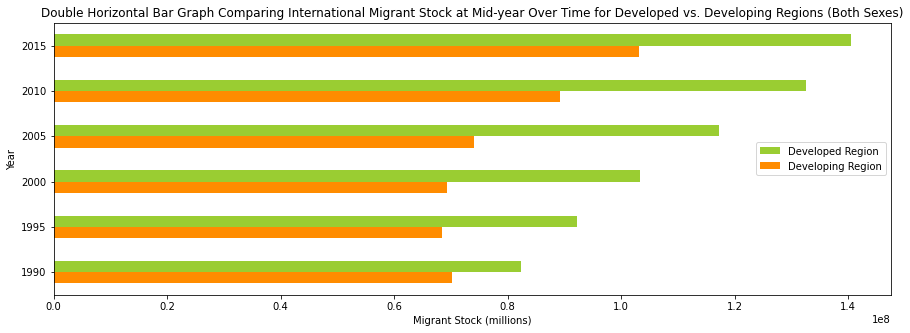

In [20]:
# The data is already sorted in descending order by developed region as desired, so we can create and check the visual.
new_df1a_barplot = new_df1a.plot.barh('Year',figsize=(15,5), color=['darkorange','yellowgreen']) # # Resize plot and change colours.
new_df1a_barplot.set(title='Double Horizontal Bar Graph Comparing International Migrant Stock at Mid-year Over Time for Developed vs. Developing Regions (Both Sexes)', xlabel='Migrant Stock (millions)') # Set titles and labels.
handles, labels = new_df1a_barplot.get_legend_handles_labels() # Reverse order of legend.
new_df1a_barplot.legend(reversed(handles), reversed(labels), loc='center right') # Move legend.

***Figure 2. Line Graph Comparing International Migrant Stock at Mid-year Over Time for Males vs. Females (Worldwide)***

---



In [21]:
# Repeat steps from above to generate Figure 2.

e = df1a.loc[df1a['Country code'] == 900] # Worldwide code.
f = e.loc[df1a['Sex'] == 'M'] # Males only.
df1a_male = f.iloc[:,[5,7]]
df1a_male = df1a_male.rename(columns={"International migrant stock at mid-year": "Male Migrant Stock"}) # Rename columns.

In [22]:
g = df1a.loc[df1a['Country code'] == 900]
h = g.loc[df1a['Sex'] == 'F'] # Females only.
df1a_female = h.iloc[:,[5,7]]
df1a_female = df1a_female.rename(columns={"International migrant stock at mid-year": "Female Migrant Stock"})

In [23]:
new_df1b = pd.merge(df1a_male, df1a_female , on=['Year'])
new_df1b # Create new, merged data frame.

,Male Migrant Stock,Year,Female Migrant Stock
0,77747510,1990,74815702
1,81737477,1995,79064275
2,87884839,2000,84818470
3,97866674,2005,93402426
4,114613714,2010,107100529
5,126115435,2015,117584801


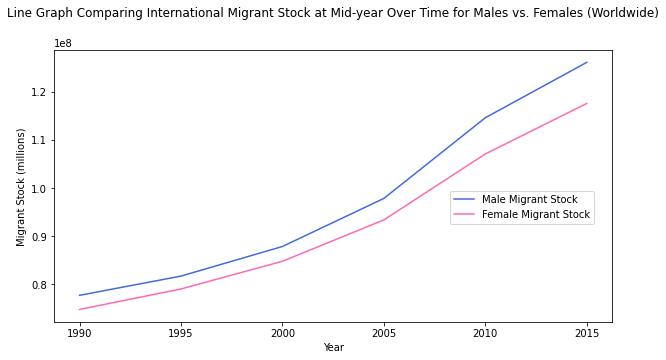

In [24]:
# The data is already sorted by year and migrant stock as desired, so we can create and check the visual.
new_df1b_lineplot = new_df1b.plot.line('Year', figsize=(10,5), color=['royalblue','hotpink']) # Resize plot and change colours.
new_df1b_lineplot.set_title('Line Graph Comparing International Migrant Stock at Mid-year Over Time for Males vs. Females (Worldwide)', y=1.1) # Set and shift title up.
new_df1b_lineplot.set_ylabel('Migrant Stock (millions)') # Set y-axis label.
new_df1b_lineplot.legend(bbox_to_anchor=(0.7, 0.5)) # Move legend.

***Figure 3. Multi Bar Graph Comparing International Migrant Stock at Mid-year Over Time by Major Area (Both Sexes)***

In [25]:
# Repeat steps from above to generate Figure 3.

df1c = df1.copy(deep=True) # Create a copy.

In [26]:
df1c = df1c[pd.to_numeric(df1c['International migrant stock at mid-year'], errors='coerce').notnull()] # Remove missing values.

In [27]:
i = df1c.loc[df1c['Country code'] == 903] # Repeat for all 6 major area codes.
i2 = i.loc[df1a['Sex'] == 'B'] # Both sexes.
i3 = i2.rename(columns={"International migrant stock at mid-year": "Africa"}) # Rename migrant stock to Region as it will appear in the plot.
i4 = i3.iloc[:,[5,7]] # Only keep migrant stock and year columns.

j = df1c.loc[df1c['Country code'] == 935]
j2 = j.loc[df1a['Sex'] == 'B']
j3 = j2.rename(columns={"International migrant stock at mid-year": "Asia"}) 
j4 = j3.iloc[:,[5,7]] 

k = df1c.loc[df1c['Country code'] == 908]
k2 = k.loc[df1a['Sex'] == 'B']
k3 = k2.rename(columns={"International migrant stock at mid-year": "Europe"}) 
k4 = k3.iloc[:,[5,7]] 

l = df1c.loc[df1c['Country code'] == 904]
l2 = l.loc[df1a['Sex'] == 'B']
l3 = l2.rename(columns={"International migrant stock at mid-year": "Latin America & Carribean"}) 
l4 = l3.iloc[:,[5,7]] 

m = df1c.loc[df1c['Country code'] == 905]
m2 = m.loc[df1a['Sex'] == 'B']
m3 = m2.rename(columns={"International migrant stock at mid-year": "North America"}) 
m4 = m3.iloc[:,[5,7]] 

n = df1c.loc[df1c['Country code'] == 909]
n2 = n.loc[df1a['Sex'] == 'B']
n3 = n2.rename(columns={"International migrant stock at mid-year": "Oceania"}) 
n4 = n3.iloc[:,[5,7]] 

In [28]:
j5 = pd.merge(i4, j4, on=['Year']) # Merge all major area data frames into one on shared year column.
k5 = pd.merge(k4, j5, on=['Year'])
l5 = pd.merge(l4, k5, on=['Year'])
m5 = pd.merge(m4, l5, on=['Year'])
n5 = pd.merge(n4, m5, on=['Year'])
new_df1c = n5 
new_df1c # Check data frame.

,Oceania,Year,North America,Latin America & Carribean,Europe,Africa,Asia
0,4730858,1990,27610542,7169728,49219200,15690623,48142261
1,5022263,1995,33341147,6694640,52842663,16352814,46548225
2,5360027,2000,40351848,6578428,56271885,14800306,49340815
3,6023421,2005,45363387,7233098,64086824,15191146,53371224
4,7125364,2010,51220996,8238795,72374755,16840014,65914319
5,8100886,2015,54488725,9233989,76145954,20649557,75081125


[Text(0, 0.5, 'Migrant Stock (millions)'),
 Text(0.5, 1.0, 'Multi Bar Graph Comparing International Migrant Stock at Mid-year Over Time by Major Area (Both Sexes)')]

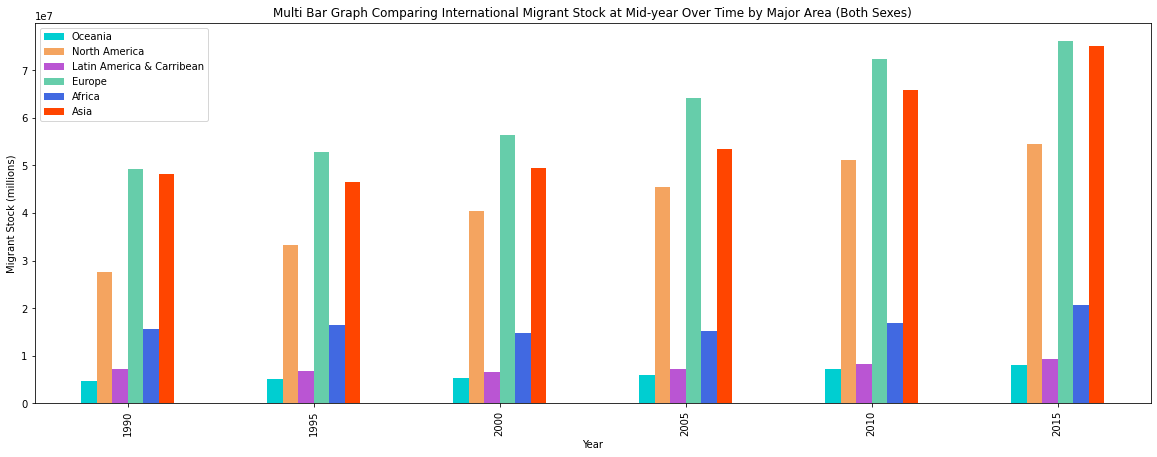

In [29]:
# The data is already sorted by year as desired, so we can create and check the visual.
new_df1c_barplot = new_df1c.plot.bar('Year',figsize=(20,7), color=['darkturquoise','sandybrown','mediumorchid','mediumaquamarine','royalblue','orangered']) # Resize and change colours.
new_df1c_barplot.set(title='Multi Bar Graph Comparing International Migrant Stock at Mid-year Over Time by Major Area (Both Sexes)', ylabel='Migrant Stock (millions)') # Change labels.

***Figure 4. Horizontal Bar Graph Comparing International Migrant Stock at Mid-year by Top 15 Countries as of 2015 (Both Sexes)***

In [30]:
# Repeat steps from above to generate Figure 4.

df1d = df1.copy(deep=True) # Create a copy.

In [31]:
df1d = df1d[pd.to_numeric(df1d['International migrant stock at mid-year'], errors='coerce').notnull()] # Remove missing values.

In [32]:
df1d.drop(df1d[df1d['Country code'] >= 900].index, inplace = True) # Remove all non-country codes.

df1d.drop(df1d[df1d['Sex'] == 'M'].index, inplace = True) # Remove males.
df1d.drop(df1d[df1d['Sex'] == 'F'].index, inplace = True) # Remove females.

df1d.drop(df1d[df1d['Year'] == '1990'].index, inplace = True) # Remove previous years.
df1d.drop(df1d[df1d['Year'] == '1995'].index, inplace = True)
df1d.drop(df1d[df1d['Year'] == '2000'].index, inplace = True)
df1d.drop(df1d[df1d['Year'] == '2005'].index, inplace = True)
df1d.drop(df1d[df1d['Year'] == '2010'].index, inplace = True)

df1d = df1d.rename(columns={"Major area, region, country or area of destination": "Country", "International migrant stock at mid-year": "Migrant Stock"}) # Rename columns to how they will appear in the plot.

new_df1d = df1d.iloc[:,[1,5]] # Only keep country and migrant stock columns.

new_df1d = new_df1d.sort_values(('Migrant Stock'), ascending=False) # Sort to find countries with highest migrant stocks.

new_df1d = new_df1d.iloc[:15] # Only keep top 15 countries.

new_df1d.head(10) # Check data frame

,Country,Migrant Stock
1561,United States of America,46627102
1498,Germany,12005690
1460,Russian Federation,11643276
1445,Saudi Arabia,10185945
1476,United Kingdom of Great Britain and Northern I...,8543120
1449,United Arab Emirates,8095126
1558,Canada,7835502
1497,France,7784418
1564,Australia,6763663
1492,Spain,5852953


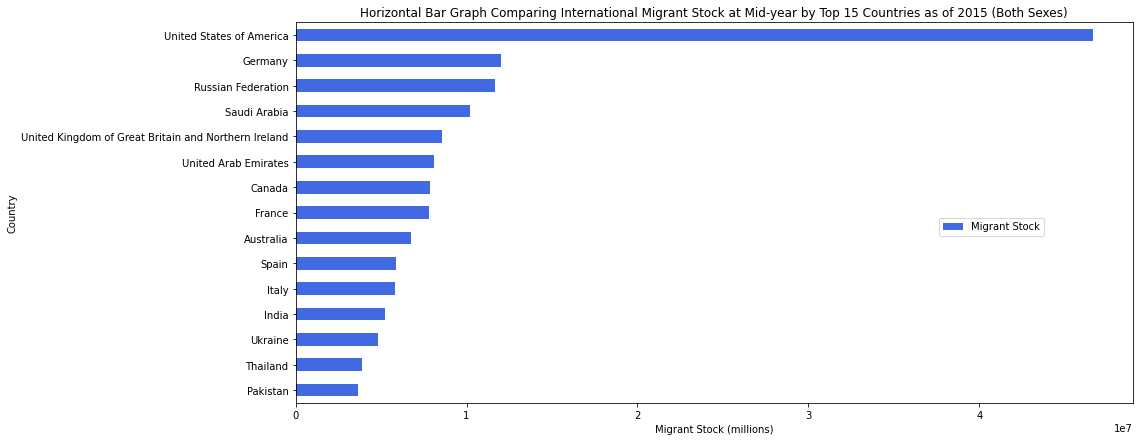

In [33]:
new_df1d = new_df1d.sort_values(('Migrant Stock')) # Sort again so highest value appears at top of plot.
new_df1d_barplot = new_df1d.plot.barh('Country',figsize=(15,7), color=['royalblue']) # Resize plot.
new_df1d_barplot.set(title='Horizontal Bar Graph Comparing International Migrant Stock at Mid-year by Top 15 Countries as of 2015 (Both Sexes)', xlabel='Migrant Stock (millions)') # Set labels.
new_df1d_barplot.legend(bbox_to_anchor=(0.9, 0.5)) # Move legend.

***Figure 5. Histograms Comparing International Migrant Stock at Mid-year Over Time Across Top 5 Countries (Both Sexes)***

In [34]:
# Repeat steps from above to generate Figure 5.

df1e = df1.copy(deep=True) # Create a copy.

In [35]:
df1e = df1e[pd.to_numeric(df1e['International migrant stock at mid-year'], errors='coerce').notnull()] # Remove missing values.

In [36]:
df1e.drop(df1e[df1e['Sex'] == 'M'].index, inplace = True) # Remove males.
df1e.drop(df1e[df1e['Sex'] == 'F'].index, inplace = True) # Remove females.

top5 = {'United States of America', 'Germany', 'Russian Federation', 'Saudi Arabia', 'United Kingdom of Great Britain and Northern Ireland'} # Top 5 countries.
new_df1e = df1e.loc[df1e['Major area, region, country or area of destination'].isin(top5)] # Only keep top 5 countries in data frame.

In [37]:
new2_df1e = new_df1e.iloc[:,[1,5,7]] # Only keep country, migrant stock, and year columns.

new2_df1e = new2_df1e.rename(columns={"Major area, region, country or area of destination": "Country", "International migrant stock at mid-year": "Migrant Stock"}) # Rename columns to how they will appear in the plot.

new2_df1e = new2_df1e.sort_values(('Year')) # Sort countries.
new2_df1e = new2_df1e.sort_values(('Migrant Stock'))

new2_df1e.head(10) # Check data frame

,Country,Migrant Stock,Year
151,United Kingdom of Great Britain and Northern I...,3650286,1990
416,United Kingdom of Great Britain and Northern I...,4155293,1995
681,United Kingdom of Great Britain and Northern I...,4730165,2000
120,Saudi Arabia,4998445,1990
385,Saudi Arabia,5122702,1995
650,Saudi Arabia,5263387,2000
946,United Kingdom of Great Britain and Northern I...,5926156,2005
173,Germany,5936181,1990
915,Saudi Arabia,6501819,2005
438,Germany,7464406,1995


In [38]:
import plotly.express as px

new2_df1e_hist = px.histogram(data_frame = new2_df1e, x='Year', y='Migrant Stock', facet_col='Country'
                , color_discrete_sequence=['royalblue']) # Create histogram.

new2_df1e_hist.update_layout(title_text='Histograms Comparing International Migrant Stock at Mid-year Over Time Across Top 5 Countries (Both Sexes)', title_x=0.5) # Set and move title.

new2_df1e_hist # Check visual. 

***Figure 6. Horizontal Bar Graph Comparing International Migrant Stock Percentage at Mid-year by Top 15 Countries as of 2015 (Both Sexes)***

In [39]:
# Repeat steps from above to generate Figure 6. 
# As we will be using df3 from A1, we will have to run the code again to append some columns and then tidy the table. 
# In Assignment 1, we had removed the columns and then tidied, however, we cannot append the columns to the tidied data frame so we will keep the columns in the original data frame then run the same code to tidy.

df3a = df3orig.copy(deep=True) # Copy the data frame. 

df3a.drop(columns=['Notes','Type of data (a)'], inplace=True) # Drop columns that are not needed.

for i in range(3,21): # Append sex to headers.

  if i in range(3,9):
    df3a.columns.values[i] = "B" 
  elif i in range (9,15):
    df3a.columns.values[i] = "M"
  else:
    df3a.columns.values[i] = "F"

for j in range(3,21): # Append sex and year in headers.

  if j in [3,9,15]:
    df3a.columns.values[j] = df3a.columns.values[j] + "1990"
  elif j in [4,10,16]:
    df3a.columns.values[j] = df3a.columns.values[j] + "1995"
  elif j in [5,11,17]:
    df3a.columns.values[j] = df3a.columns.values[j] + "2000"
  elif j in [6,12,18]:
    df3a.columns.values[j] = df3a.columns.values[j] + "2005"
  elif j in [7,13,19]:
    df3a.columns.values[j] = df3a.columns.values[j] + "2010"
  else:
    df3a.columns.values[j] = df3a.columns.values[j] + "2015"

df3a.drop([0],inplace=True) # Remove the second header row.

df3a = df3a.melt(id_vars = ['Sort\norder', 'Major area, region, country or area of destination','Country code']
                 , var_name = "sex_yr", value_name = "International migrant stock as a percentage of total population") # Melt the sex/year from column headers to values in a column.

df3a = df3a.assign(Sex = lambda x: x.sex_yr.str[0].astype(str), Year = lambda x: x.sex_yr.str[1:].astype(str)).drop("sex_yr",axis=1) # Split sex and year into two variables and columns.

In [40]:
df3a = df3a[pd.to_numeric(df3a['International migrant stock as a percentage of total population'], errors='coerce').notnull()] # Remove missing values.

In [41]:
df3a.drop(df3a[df3a['Country code'] >= 900].index, inplace = True) # Remove all non-country codes.

df3a.drop(df3a[df3a['Sex'] == 'M'].index, inplace = True) # Remove males.
df3a.drop(df3a[df3a['Sex'] == 'F'].index, inplace = True) # Remove females.

df3a.drop(df3a[df3a['Year'] == '1990'].index, inplace = True) # Remove previous years.
df3a.drop(df3a[df3a['Year'] == '1995'].index, inplace = True)
df3a.drop(df3a[df3a['Year'] == '2000'].index, inplace = True)
df3a.drop(df3a[df3a['Year'] == '2005'].index, inplace = True)
df3a.drop(df3a[df3a['Year'] == '2010'].index, inplace = True)
 
df3a = df3a.rename(columns={"Major area, region, country or area of destination": "Country", "International migrant stock as a percentage of total population": "Migrant Stock Percentage"}) # Rename columns to how they will appear in the plot.

In [42]:
new_df3a = df3a.iloc[:,[1,3]] # Only keep country and migrant stock columns.

new_df3a = new_df3a.sort_values(('Migrant Stock Percentage'), ascending=False) # Sort to find countries with highest migrant stocks.

new_df3a = new_df3a.iloc[:15] # Only keep top 15 countries.

new_df3a.head(10) # Check data frame.

,Country,Migrant Stock Percentage
1484,Holy See,100.0
1449,United Arab Emirates,88.404048
1444,Qatar,75.497628
1441,Kuwait,73.639551
1528,Sint Maarten (Dutch part),70.4478
1499,Liechtenstein,62.596254
1479,Andorra,59.713649
1405,"China, Macao Special Administrative Region",58.321903
1512,British Virgin Islands,57.469203
1501,Monaco,55.768466


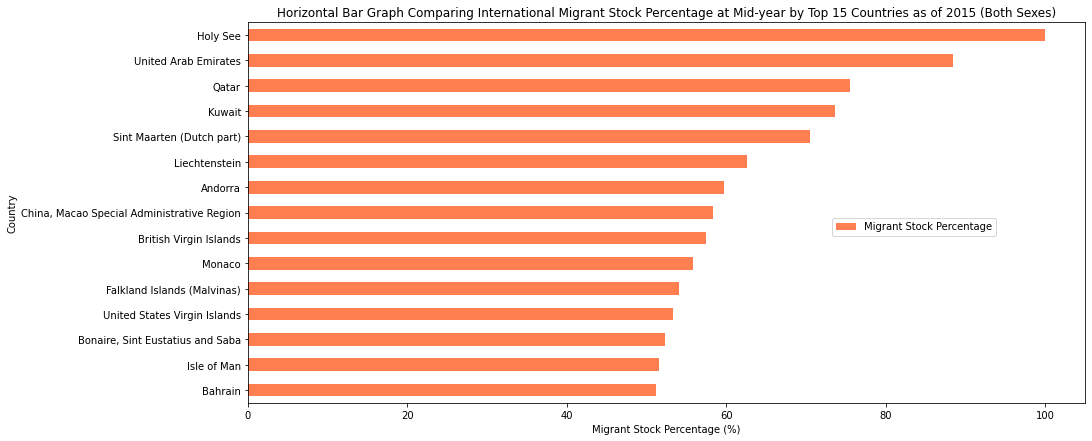

In [43]:
new_df3a = new_df3a.sort_values(('Migrant Stock Percentage')) # Sort again so highest value appears at top of plot.
new_df3a_barplot = new_df3a.plot.barh('Country',figsize=(15,7), color=['coral']) # Resize plot.
new_df3a_barplot.set(title='Horizontal Bar Graph Comparing International Migrant Stock Percentage at Mid-year by Top 15 Countries as of 2015 (Both Sexes)', xlabel='Migrant Stock Percentage (%)') # Set labels.
new_df3a_barplot.legend(bbox_to_anchor=(0.9, 0.5)) # Move legend.

***Figure 7. Scatterplot Comparing Estimated Refugee Stock at Mid-year Over Time by Major Area - Consolidated (Both Sexes)***

In [44]:
# Repeat steps from above to generate Figure 7. 
# As we will be using df6 from A1, we will have to run the code again to append some columns and then tidy the table (same reason as Figure 6). 

df6a = df6orig.copy(deep=True) # Copy the data frame. 

df6a = df6a.iloc[:,[1,3,5,6,7,8,9,10]] # Drop columns that are not needed.

df6a.columns.values[2] = "1990" # Move year data to header.
df6a.columns.values[3] = "1995"
df6a.columns.values[4] = "2000"
df6a.columns.values[5] = "2005"
df6a.columns.values[6] = "2010"
df6a.columns.values[7] = "2015"

df6a.drop([0],inplace=True) # Remove the second header row. 

df6a = df6a.melt(id_vars = ['Major area, region, country or area of destination','Country code'], var_name = "Year", value_name = "Estimated refugee stock at mid-year") # Melt the sex/year from column headers to values in a column.

In [45]:
df6a = df6a[pd.to_numeric(df6a['Estimated refugee stock at mid-year'], errors='coerce').notnull()] # Remove missing values.

In [46]:
areas = {'Africa', 'Asia', 'Europe', 'Latin America and the Caribbean', 'Northern America', 'Oceania'} # Major areas.
new_df6a = df6a.loc[df6a['Major area, region, country or area of destination'].isin(areas)] # Only keep 6 major areas in data frame.

In [47]:
new_df6a = new_df6a.rename(columns={"Major area, region, country or area of destination": "Major Area", "Estimated refugee stock at mid-year": "Refugee Stock"}) # Rename columns to how they will appear in the plot.

new_df6a = new_df6a.iloc[:,[0,2,3]] # Only keep country, year, and refugee stock columns.

new_df6a.head(10) # Check data frame.

,Major Area,Year,Refugee Stock
6,Africa,1990,5687352
70,Asia,1990,9937007
126,Europe,1990,1321884
179,Latin America and the Caribbean,1990,1197198
231,Northern America,1990,583450
237,Oceania,1990,109680
271,Africa,1995,5949953
335,Asia,1995,7937682
391,Europe,1995,2746090
444,Latin America and the Caribbean,1995,352256


In [48]:
new_df6a_scatter = px.scatter(data_frame = new_df6a, x ='Year', y='Refugee Stock', color='Major Area', width=1000) # Create scatter plot.
new_df6a_scatter.update_layout(title_text='Scatterplot Comparing Estimated Refugee Stock at Mid-year Over Time by Major Area - Consolidated (Both Sexes)', title_x=0.5) # Set and move title.
new_df6a_scatter.update_traces(marker=dict(size=12,line=dict(width=1, color='Grey')), selector=dict(mode='markers')) # Customize markers.

***Figure 8. Line Graphs Comparing Estimated Refugee Stock at Mid-year Over Time by Major Area - Detailed (Both Sexes)***

In [49]:
# Using data frame from Figure 7.
new_df6a_line = px.line(data_frame = new_df6a, x ='Year', y='Refugee Stock', facet_col='Major Area', color='Major Area') # Create scatter plot.
new_df6a_line.update_layout(title_text='Line Graphs Comparing Estimated Refugee Stock at Mid-year Over Time by Major Area - Detailed (Both Sexes)', title_x=0.4) # Set and move title.

***Figure 9. Boxplots Comparing Estimated Refugee Stock at Mid-year Over Time in Asian Regions (Both Sexes)***

In [ ]:
df6b = df6a.copy(deep=True) # Copy the data frame. 

regions = {'Central Asia', 'Eastern Asia', 'South-Eastern Asia', 'Southern Asia', 'Western Asia'} # Specify regions.
df6b = df6b.loc[df6b['Major area, region, country or area of destination'].isin(regions)] # Only keep regions in data frame.
new_df6b = df6b.iloc[:,[0,2,3]] # Only keep region, year, and refugee stock columns.
new_df6b = new_df6b.rename(columns={"Major area, region, country or area of destination": "Region", "Estimated refugee stock at mid-year": "Refugee Stock"}) # Rename columns to how they will appear in the plot.

new_df6b_box = px.box(new_df6b, x='Year', y='Refugee Stock') # Create boxplots.
new_df6b_box.update_layout(title_text='Boxplots Comparing Estimated Refugee Stock at Mid-year Over Time in Asian Regions (Both Sexes)', title_x=0.5) # Set and move title.